<a href="https://colab.research.google.com/github/CanoPablo/Deep_Learning/blob/main/Reto_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decomprimir GloVe

In [1]:
#!unzip -u "/content/drive/MyDrive/Colegio_Bourbaki/Deep_Learning/GloVe/glove.6B.zip" -d "/content/drive/MyDrive/Colegio_Bourbaki/Deep_Learning/GloVe/glove.6B.300d"

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/AnIsAsPe/LogisticRegression_SpamOpinion/master/Datos/spam_enron1.csv", low_memory=False)

In [4]:
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [5]:
data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [7]:
data.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [8]:
df = pd.DataFrame(data, columns=["text", "label_num"])

In [9]:
df

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


In [11]:
# Configurar la opción max_colwidth para mostrar todo el texto
pd.set_option('display.max_colwidth', None)

print(df.text.head(5))

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## Preprocesamiento

In [12]:
# Text preprocessing
!pip install contractions
import contractions
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.8 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
stop_words = set(stopwords.words("english"))
html_tags_pattern = re.compile(r"<.*?>")

In [15]:
def text_cleaner(text):
    """
    Clean text column in the dataset.
    """
    # Remove HTML tags
    new_string = re.sub(html_tags_pattern, "", text)
    # Remove quotes
    new_string = re.sub(r'"', "", new_string)
    # Expand contractions using the dictionary
    new_string = contractions.fix(new_string)
    # Remove possessive 's
    new_string = re.sub(r"'s\b", "", new_string)
    # Match all strings that contain a non-letter
    new_string = re.sub("[^a-zA-Z]", " ", new_string)
    # Lowercase words
    new_string = new_string.lower()
    # Remove non-alphabetic characters and short words, filter stop words
    tokens = [
        w
        for w in re.findall(r"\b\w+\b", new_string)
        if len(w) >= 3 and w not in stop_words
    ]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join long words
    cleaned_text = " ".join(tokens).strip()

    return cleaned_text

In [16]:
%%time
df["text"] = df["text"].apply(text_cleaner)
# Lo hacemos in-place

CPU times: user 6.71 s, sys: 77.8 ms, total: 6.79 s
Wall time: 9.82 s


In [17]:
df

,text,label_num
0,subject enron methanol meter follow note gave monday preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed soon possible economics purpose,0
1,subject hpl nom january see attached file hplnol xl hplnol xl,0
2,subject neon retreat around wonderful time year neon leader retreat time know time year extremely hectic tough think anything past holiday life past week december january like think minute calender handed beginning fall semester retreat scheduled weekend january youth minister conference brad dustin connected week going change date following weekend january come part need think think agree important get together time recharge battery get far spring semester lot trouble difficult get away without kid etc brad came potential alternative get together weekend let know prefer first option would retreat similar done past several year year could heartland country inn www com outside brenham nice place bedroom bedroom house side side country real relaxing also close brenham one hour minute golf shop antique craft store brenham eat dinner together ranch spend time meet saturday return sunday morning like done past second option would stay houston dinner together nice restaurant dessert time visiting recharging one home saturday evening might easier trade would much time together let decide email back would preference course available weekend democratic process prevail majority vote rule let hear soon possible preferably end weekend vote way complaining allowed like tend great weekend great golf great fishing great shopping whatever make happy bobby,0
3,subject photoshop window office cheap main trending abasement darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clear bayda inconveniencing managing represented smartness hashish academy shareholder unload badness danielson pure caffein spaniard chargeable levin,1
4,subject indian spring deal book teco pvr revenue understanding teco sends check received answer whether predermined price associated deal teco let know giving continue chase deal need,0
...,...,...
5166,subject put transport volume decreased contract thanks ami forwarded ami chokshi corp enron royal edmondson reliantenergy com ami chokshi enron com subject put see attached file hpl sept xl hpl sept xl,0
5167,subject following noms hpl take extra mmcf weekend try next week nom stay mmcf redeliveries fcv carthage forwarded bruce mcmills ftworth pefs pec bruce mcmills dfarmer enron com briley enron com stacey neuweiler enron com chad ca gc cec pec pec william speckels gc cec pec pec donna spencer gc cec pec pec michael cherry easttexas pefs pec pec darrel bane easttexas pefs pec pec subject following noms nominate mmbtu eastrans following deliver fuel cotton valley continue mmbtu sale mmbtu cartwheel agreement carthage,0
5168,subject calpine daily gas nomination julie mention earlier hope start unit afternoon still experiencing difficulty keep informed thanks ricky archer fuel supply louisiana suite houston texas direct fax calpine daily gas nomination doc calpine daily gas nomination doc,0
5169,subject industrial worksheet august activity attached worksheet august activity three different worksheet supply market market worksheet preliminary continuously updated throughout month supply worksheet capture buyback relevant pricing data three worksheet found two separate file logistics robert lloyd buydeaug xl supply logistics ken sorry delay providing data,0


In [18]:
# Suponiendo que 'df' es tu DataFrame y 'column_name' es el nombre de la columna que contiene los registros
df['text'] = df['text'].str.replace('subject ', '', regex=False)

In [19]:
df

,text,label_num
0,enron methanol meter follow note gave monday preliminary flow data provided daren please override pop daily volume presently zero reflect daily activity obtain gas control change needed soon possible economics purpose,0
1,hpl nom january see attached file hplnol xl hplnol xl,0
2,neon retreat around wonderful time year neon leader retreat time know time year extremely hectic tough think anything past holiday life past week december january like think minute calender handed beginning fall semester retreat scheduled weekend january youth minister conference brad dustin connected week going change date following weekend january come part need think think agree important get together time recharge battery get far spring semester lot trouble difficult get away without kid etc brad came potential alternative get together weekend let know prefer first option would retreat similar done past several year year could heartland country inn www com outside brenham nice place bedroom bedroom house side side country real relaxing also close brenham one hour minute golf shop antique craft store brenham eat dinner together ranch spend time meet saturday return sunday morning like done past second option would stay houston dinner together nice restaurant dessert time visiting recharging one home saturday evening might easier trade would much time together let decide email back would preference course available weekend democratic process prevail majority vote rule let hear soon possible preferably end weekend vote way complaining allowed like tend great weekend great golf great fishing great shopping whatever make happy bobby,0
3,photoshop window office cheap main trending abasement darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clear bayda inconveniencing managing represented smartness hashish academy shareholder unload badness danielson pure caffein spaniard chargeable levin,1
4,indian spring deal book teco pvr revenue understanding teco sends check received answer whether predermined price associated deal teco let know giving continue chase deal need,0
...,...,...
5166,put transport volume decreased contract thanks ami forwarded ami chokshi corp enron royal edmondson reliantenergy com ami chokshi enron com put see attached file hpl sept xl hpl sept xl,0
5167,following noms hpl take extra mmcf weekend try next week nom stay mmcf redeliveries fcv carthage forwarded bruce mcmills ftworth pefs pec bruce mcmills dfarmer enron com briley enron com stacey neuweiler enron com chad ca gc cec pec pec william speckels gc cec pec pec donna spencer gc cec pec pec michael cherry easttexas pefs pec pec darrel bane easttexas pefs pec pec following noms nominate mmbtu eastrans following deliver fuel cotton valley continue mmbtu sale mmbtu cartwheel agreement carthage,0
5168,calpine daily gas nomination julie mention earlier hope start unit afternoon still experiencing difficulty keep informed thanks ricky archer fuel supply louisiana suite houston texas direct fax calpine daily gas nomination doc calpine daily gas nomination doc,0
5169,industrial worksheet august activity attached worksheet august activity three different worksheet supply market market worksheet preliminary continuously updated throughout month supply worksheet capture buyback relevant pricing data three worksheet found two separate file logistics robert lloyd buydeaug xl supply logistics ken sorry delay providing data,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


## Nube de palabras

In [34]:
from wordcloud import WordCloud
def nube_palabras(sec_textos):
    # Crear la cadena con la que haremos la nube de palabras
    text= " ".join(review for review in sec_textos) # Juntando todos los textos con un espacio entre ellas

    # Crear la nube de palabras
    wordcloud = WordCloud(max_font_size=50,
                          max_words=100,
                          background_color="white").generate(text)

    # Desplegar la imagen generada
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

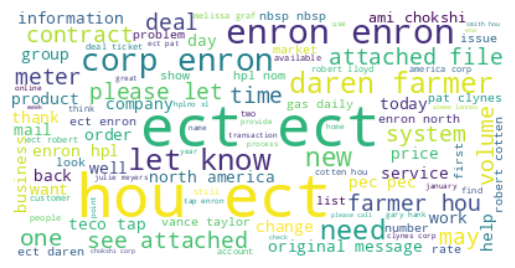

In [35]:
nube_palabras(df['text'])

## Distribución de las secuencias

In [21]:
text_words = df["text"].apply(lambda x: len(str(x).split()))

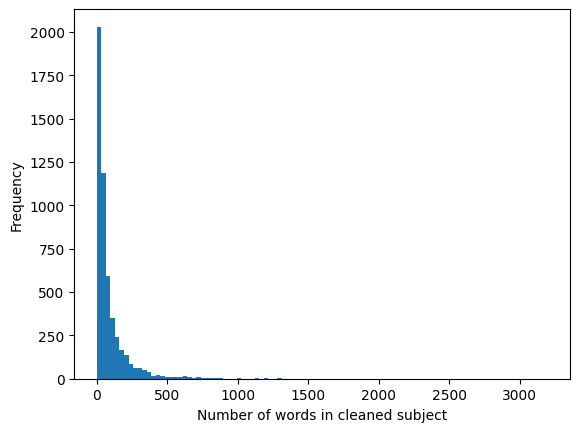

In [22]:
text_words.plot.hist(bins=100)
plt.xlabel("Number of words in cleaned subject")
plt.show()

In [23]:
text_words.describe()

count    5171.000000
mean       90.026107
std       141.326390
min         1.000000
25%        20.000000
50%        44.000000
75%       101.000000
max      3198.000000
Name: text, dtype: float64

In [24]:
p = 0.97
print(f"El {100*p:.0f}% de los textos tienen {text_words.quantile(p):.0f} palabras")

El 97% de los textos tienen 413 palabras


In [25]:
all_text = " ".join(df["text"])
text_unique_words = set(all_text.split())
text_unique_words = len(text_unique_words)
print(f"Los textos tienen {text_unique_words} palabras únicas")

Los textos tienen 42658 palabras únicas


### Dividir conjunto entrenamiento y prueba.

In [26]:
# Utils
import os
import sys
from sklearn.model_selection import train_test_split

In [27]:
#Separar las etiquetas del conjunto de datos

Y = df['label_num']
X = df['text']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2, random_state=42, shuffle=True)

In [29]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.1, random_state=42)

In [30]:
x_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 3722 entries, 858 to 1188
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
3722 non-null   object
dtypes: object(1)
memory usage: 58.2+ KB


In [31]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 3722 entries, 858 to 1188
Series name: label_num
Non-Null Count  Dtype
--------------  -----
3722 non-null   int64
dtypes: int64(1)
memory usage: 58.2 KB


In [32]:
# Verifico cómo son los conjuntos de entrenamiento y prueba.

print("TRAINING SET")
print("X: ", x_train.shape)
print("Y: ", y_train.shape)
print('Spam:{:7.3f}%'.format(y_train.mean()*100),'\n')

print("VALIDATION SET")
print("X: ", x_val.shape)
print("Y: ", y_val.shape)
print('Spam:{:7.3f}%'.format(y_test.mean()*100),'\n')

print("TEST SET")
print("X: ", x_test.shape)
print("Y: ", y_test.shape)
print('Spam:{:7.3f}%'.format(y_test.mean()*100))

TRAINING SET
X:  (3722,)
Y:  (3722,)
Spam: 29.151% 

VALIDATION SET
X:  (414,)
Y:  (414,)
Spam: 28.309% 

TEST SET
X:  (1035,)
Y:  (1035,)
Spam: 28.309%


In [33]:
y_test

1566    0
1988    1
1235    0
2868    0
4903    0
       ..
1175    1
4476    0
4198    1
2689    0
2142    0
Name: label_num, Length: 1035, dtype: int64

## Tokenización

In [34]:
# Tokenizer
import sentencepiece as spm

In [35]:
x_train.to_csv("/content/drive/MyDrive/Colegio_Bourbaki/Deep_Learning/Semana_3/x_train.csv", index=False, header=False)

In [36]:
spm_spam_train = spm.SentencePieceTrainer.Train(
    input="/content/drive/MyDrive/Colegio_Bourbaki/Deep_Learning/Semana_3/x_train.csv",
    model_prefix="/content/drive/MyDrive/Colegio_Bourbaki/Deep_Learning/Semana_3/x_train",
    model_type="word",
    max_sentence_length=15000,
    vocab_size=30000,
)

El vocab_size estaba en 44,000 como lo tenía Pablo, me marcó este error:

Vocabulary size too high (44000). Please set it to a value <= 37179.

No sé por qué.

In [37]:
sp_spam = spm.SentencePieceProcessor(model_file="/content/drive/MyDrive/Colegio_Bourbaki/Deep_Learning/Semana_3/x_train.model")

In [38]:
import numpy as np

In [39]:
# convert text sequences into integer sequences
x_train = list(sp_spam.encode(x_train.to_list()))
x_val = list(sp_spam.encode(x_val.to_list()))
x_test = list(sp_spam.encode(x_test.to_list()))

In [40]:
y_train.to_csv("/content/drive/MyDrive/Colegio_Bourbaki/Deep_Learning/Semana_3/y_train.csv", index=False)

In [41]:
y_train = list((y_train.to_list()))
y_val = list((y_val.to_list()))
y_test = list((y_test.to_list()))

In [ ]:
# y_train

### Encajes de Palabras: GloVe

In [43]:
def load_glove_model(glove_file):
    """Load GloVe pre-trained word embeddings into a dictionary."""
    embedding_dict = {}
    with open(glove_file, "r", encoding="utf-8") as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype="float32")
            embedding_dict[word] = vector

    return embedding_dict

In [44]:
embedding_bag = load_glove_model("/content/drive/MyDrive/Colegio_Bourbaki/Deep_Learning/GloVe/glove.6B/glove.6B.300d.txt")

In [45]:
# Initialize a list to store the words
text_voc = []

# Open the file and read its contents
with open("/content/drive/MyDrive/Colegio_Bourbaki/Deep_Learning/Semana_3/x_train.vocab", "r", encoding="utf-8") as file:
    for line in file:
        # Split each line by tab ('\t') to separate the word from the score
        parts = line.strip().split("\t")

        # Check if the line has two parts (word and score)
        if len(parts) == 2:
            word = parts[0]

            # Remove the first underscore if it exists
            if word.startswith("▁"):
                word = word[1:]

            # Append the modified word to the list
            text_voc.append(word)

In [46]:
# Diccionarios de las reseñas
word_idx_text = dict(zip(text_voc, range(len(text_voc))))
idx_word_text = {index: word for word, index in word_idx_text.items()}

In [47]:
def word_vectors(dic_vocabulary, dic_embeddings_words, embedding_dim):
    """Obtiene una matriz donde cada renglón es el 'embedding vector' de una
    palabra del vocabulario"""
    num_tokens = len(dic_vocabulary)
    embedding_matrix = np.zeros((num_tokens, embedding_dim))
    found = 0
    missing_words = []

    for word, i in dic_vocabulary.items():
        embedding_vector = dic_embeddings_words.get(word)
        if embedding_vector is not None:
            # Asigna el embedding vector directamente en la matriz
            embedding_matrix[i] = embedding_vector
            found += 1
        else:
            missing_words.append(word)

    ratio = found / num_tokens * 100
    print(
        f"{found} palabras vectorizadas, que representan {ratio:.1f}% de todas las palabras en el corpus"
    )
    return embedding_matrix, missing_words

In [48]:
embedding_matrix_text, missing_words_text = word_vectors(
    word_idx_text, embedding_bag, 300
)
embedding_matrix_text.shape

21484 palabras vectorizadas, que representan 71.6% de todas las palabras en el corpus


(30000, 300)

In [49]:
# Initialize embeddings for the new words
new_embeddings_text = []

# Initialize embeddings for the new words and add them to the dictionary
for new_word in missing_words_text[3:]:
    # Initialize the embedding for the new word with random values (dimension: 300)
    new_embedding = np.random.rand(300)   # El riesgo acá es que perdemos relación semántica con los vectores random, porque Glove ya está entrenado con valores que establecen relación semántica
    # Add the new word and its embedding to the list
    new_embeddings_text.append(new_embedding)

new_embeddings_text = np.array(new_embeddings_text)

extended_embedding_matrix_text = np.concatenate(
    (embedding_matrix_text, new_embeddings_text), axis=0
)

In [50]:
extended_embedding_matrix_text.shape

(38513, 300)

In [51]:
extended_embedding_matrix_text

array([[ 0.42919099, -0.29689699,  0.15011001, ...,  0.28975001,
         0.32618001, -0.0590532 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.86289478,  0.94516042,  0.32944948, ...,  0.10410137,
         0.4847918 ,  0.42889104],
       [ 0.77172158,  0.2628512 ,  0.38421445, ...,  0.703545  ,
         0.91536753,  0.78047241],
       [ 0.58235889,  0.50959484,  0.87528431, ...,  0.52002604,
         0.95397713,  0.77363424]])

### Modelo para spam

In [52]:
# Data Loading
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, TensorDataset

In [53]:
max_len_text = int(text_words.quantile(p))

In [54]:
# Casting a LongTensor
x_train_sequences = [torch.tensor(seq, dtype=torch.long) for seq in x_train]
x_val_sequences = [torch.tensor(seq, dtype=torch.long) for seq in x_val]
x_test_sequences = [torch.tensor(seq, dtype=torch.long) for seq in x_test]

x_train_padded = pad_sequence(x_train_sequences, padding_value=0, batch_first=True)[
    :, :max_len_text
]

x_test_padded = pad_sequence(x_test_sequences, padding_value=0, batch_first=True)[
    :, :max_len_text
]

x_val_padded = pad_sequence(x_val_sequences, padding_value=0, batch_first=True)[
    :, :max_len_text
]


In [55]:
x_test_padded.size()

torch.Size([1035, 412])

In [57]:
# Convertir listas de etiquetas a tensores de PyTorch
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [58]:
train_dataset = TensorDataset(x_train_padded, y_train_tensor)
val_dataset = TensorDataset(x_val_padded, y_val_tensor)
test_dataset = TensorDataset(x_test_padded, y_test_tensor)

In [59]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [87]:
# Definir hiperparámetros
input_size = extended_embedding_matrix_text.shape[0]  # Dimensión del embedding
hidden_size = 600  # Tamaño del hidden state
num_layers = 1  # Número de capas de la RNN
output_size = 2  # Tamaño de la salida (en este caso, 2 clases: spam y no spam)
learning_rate = 0.001
num_epochs = 10
batch_size = 128

In [88]:
# Inicializar el tensor hx con ceros
hx = torch.zeros(num_layers, batch_size, hidden_size)

# Imprimir las dimensiones del tensor hx
print("Dimensiones de hx:", hx.size())

Dimensiones de hx: torch.Size([1, 128, 600])


In [99]:
input_size

38513

In [102]:
print("Dimensiones de inputs:", inputs.size())

Dimensiones de inputs: torch.Size([128, 412])


In [61]:
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)

In [62]:
import torch.optim as optim

In [93]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Inicializar hidden state
        h0 = torch.zeros(self.num_layers, self.hidden_size).to(x.device)

        # Pasar la entrada a través de la RNN
        out, _ = self.rnn(x, h0)

        # Obtener el último paso de la secuencia
        out = self.fc(out[:, -1, :])
        return out


In [64]:
extended_embedding_matrix_text.shape[0]

38513

In [94]:
# Crear instancias del modelo, función de pérdida y optimizador
model = RNN(input_size, hidden_size, num_layers, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [95]:
# Crear DataLoader para los conjuntos de datos
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size)
test_loader = DataLoader(test_dataset, batch_size)

In [67]:
print(x_test_padded.size())

torch.Size([1035, 412])


In [68]:
print(y_test_tensor.size())

torch.Size([1035])


In [74]:
# from torchsummary import summary
from tqdm.notebook import tqdm  # Display progress bar

In [91]:
inputs = inputs.unsqueeze(0)  # Agregar dimensión del tamaño del lote al principio


In [97]:
# Entrenar el modelo
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs.float())
        # outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Evaluar el modelo en el conjunto de validación
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Calcular precisión y pérdida en el conjunto de validación
        accuracy = correct / total
        val_loss /= len(val_loader)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")

# Evaluar el modelo en el conjunto de prueba
model.eval()
with torch.no_grad():
    test_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calcular precisión y pérdida en el conjunto de prueba
    accuracy = correct / total
    test_loss /= len(test_loader)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.4f}")


RuntimeError: input.size(-1) must be equal to input_size. Expected 38513, got 412